In [ ]:
import csv
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/DL Implementation/price.csv'

Mounted at /content/drive


Note that in this labwork, I do not use *simpy* library since we are working with a specific, pre-defined linear function, while in the previous one, the input functions are varied, and it was difficult to manually hardcode/calculate all variation of derivative.

In [ ]:
def load_data_from_csv(file_path):
    x, y = [], []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return x, y

In [12]:
def linear_regression(x, y, r: float, iters: int):
  """
  This function takes 4 arguments: y-target value, x-input value, r- learning rate, iters: iteration
  It initializes 2 values: weight w1 = 1 and bias w0 = 0
  Inside the loop, gradient descent is applied: partial derivative of w0 and w1 are calcualated, then update w0 and w1 value, calculate the loss, then repeat.
  """
  N = len(x)
  w0 = 0
  w1 = 1
  print(f"{'Step'} {'w0'} {'w1'} {'Loss'}")

  for i in range(iters):
        y_hat = [w1 * x[j] + w0 for j in range(N)]
        # update derivative
        dw0 = sum((y_hat[j] - y[j]) for j in range(N)) / N
        dw1 = sum((y_hat[j] - y[j]) * x[j] for j in range(N)) / N
        # update the weight, like in the formula
        w0 -= r * dw0
        w1 -= r * dw1

        loss = sum((y_hat[j] - y[j]) ** 2 for j in range(N)) / (2 * N)
        print(f"{i} {w0:} {w1} {loss}")

  return w0, w1

In [15]:
x, y = load_data_from_csv(file_path)
for lr in [0.1,0.001,0.0001]:
  w0, w1 = linear_regression(x, y, lr, iters=10)
  print(f"LR model: y = {w1} * x + {w0}")


Step w0 w1 Loss
0 5.9 266.0 1772.5
1 -1101.79 -63623.780000000006 84337108.805
2 266238.365 15338465.498000005 4901329809921.237
3 -64181930.46310002 -3697687879.1510015 2.848463863818497e+17
4 15472525365.117418 891412343490.3365 1.6554173456220363e+22
5 -3730006569820.708 -214895359387197.62 9.620647195125975e+26
6 899203503513401.2 5.180544763990838e+16 5.591149126101873e+31
7 -2.167735969344532e+17 -1.2488889535932678e+19 3.249360247421524e+36
8 5.225823981367624e+19 3.0107328272669003e+21 1.8884028630594762e+41
9 -1.2598045458688673e+22 -7.258060959785406e+23 1.0974669170772986e+46
LR model: y = -7.258060959785406e+23 * x + -1.2598045458688673e+22
Step w0 w1 Loss
0 0.059000000000000004 3.65 1772.5
1 0.006641000000000001 -0.11547800000000041 3250.312440500001
2 0.11248443500000002 5.2336998380000015 6233.406085562367
3 -0.006443442631000024 -2.3665781162300012 12254.865963167305
4 0.19395928169329105 8.430811549637106 24409.179608049086
5 -0.059328762673160756 -6.909898690315808 48

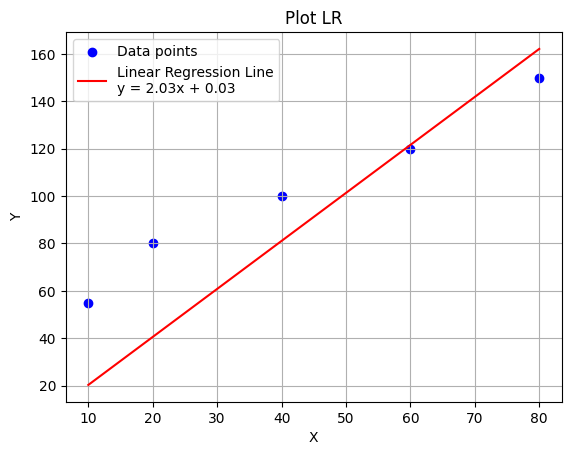

In [16]:
plt.scatter(x, y, color='blue', label='Data points')

# calculate y
x_min, x_max = min(x), max(x)
x_range = [x_min, x_max]
y_pred = [w1 * x + w0 for x in x_range]

#plot the graph
plt.plot(x_range, y_pred, color='red', label=f'Linear Regression Line\ny = {w1:.2f}x + {w0:.2f}')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plot LR")
plt.legend()
plt.grid(True)
plt.show()